<a href="https://colab.research.google.com/github/nsp8/TensorFlow-NLP/blob/master/TF_NLP_SarcasmData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
-O /tmp/sarcasm.json

--2019-09-14 11:23:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 2a00:1450:400c:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  35.8MB/s    in 0.2s    

2019-09-14 11:23:22 (35.8 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [2]:
import json
import tensorflow as tf
print(tf.__version__)

tf.enable_eager_execution()

1.14.0


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
from matplotlib import pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()


In [0]:
with open('/tmp/sarcasm.json') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [0]:
vocab_size = 1000 # prev: 10000
embedding_dim = 20 # prev: 16 --- 16 -> 20 -> 24 -> 20
max_length = 20 # prev: 32 -> 16 -> 20 -> 24 -> 16
trunc_type = 'post'
padding_type = 'post'
oov_token = '<oov>'
training_size = 20000

In [0]:
training_sentences, testing_sentences = sentences[0: training_size], sentences[training_size:]
training_labels, testing_labels = labels[0: training_size], labels[training_size:]

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [0]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, 
                                maxlen=max_length,
                                padding=padding_type,
                                truncating=trunc_type)

In [0]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,
                               maxlen=max_length,
                               padding=padding_type,
                               truncating=trunc_type)

In [0]:
model = tf.keras.Sequential([
            tf.keras.layers.Embedding(vocab_size, 
                                      embedding_dim, 
                                      input_length=max_length),
            tf.keras.layers.GlobalAveragePooling1D(),
            tf.keras.layers.Dense(24, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [164]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 20, 20)            20000     
_________________________________________________________________
global_average_pooling1d_17  (None, 20)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 25        
Total params: 20,529
Trainable params: 20,529
Non-trainable params: 0
_________________________________________________________________


In [165]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels),
                    verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/10
20000/20000 - 3s - loss: 0.5281 - acc: 0.7276 - val_loss: 0.4128 - val_acc: 0.8100
Epoch 2/10
20000/20000 - 3s - loss: 0.3790 - acc: 0.8265 - val_loss: 0.4037 - val_acc: 0.8147
Epoch 3/10
20000/20000 - 3s - loss: 0.3635 - acc: 0.8346 - val_loss: 0.3993 - val_acc: 0.8129
Epoch 4/10
20000/20000 - 3s - loss: 0.3573 - acc: 0.8368 - val_loss: 0.4013 - val_acc: 0.8128
Epoch 5/10
20000/20000 - 3s - loss: 0.3539 - acc: 0.8408 - val_loss: 0.4066 - val_acc: 0.8126
Epoch 6/10
20000/20000 - 3s - loss: 0.3520 - acc: 0.8394 - val_loss: 0.4093 - val_acc: 0.8113
Epoch 7/10
20000/20000 - 3s - loss: 0.3502 - acc: 0.8406 - val_loss: 0.4037 - val_acc: 0.8143
Epoch 8/10
20000/20000 - 3s - loss: 0.3472 - acc: 0.8414 - val_loss: 0.4017 - val_acc: 0.8150
Epoch 9/10
20000/20000 - 3s - loss: 0.3443 - acc: 0.8431 - val_loss: 0.4019 - val_acc: 0.8152
Epoch 10/10
20000/20000 - 3s - loss: 0.3400 - acc: 0.8442 - val_loss: 0.3971 - val_acc: 0.8176


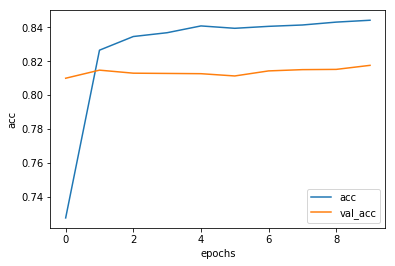

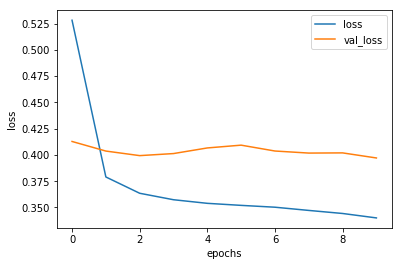

In [166]:
plot_graphs(history, 'acc')
plot_graphs(history, 'loss')